In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import defaultdict
from collections import Counter
import string as str
import re
import ast 
from pathlib import Path

In [13]:
df = pd.read_csv("/Users/emilyzou/Desktop/pol/Oct14_Merged_Token_Dei.csv")
df['Raw_Tokens_Lower'] = df['Raw_Tokens_Lower'].apply(ast.literal_eval)

In [14]:
def fix_contractions(tokens):
    contraction_suffixes = ["'t", "'m", "'ve", "'ll", "'d", "'re", "'s", "n't"]
    fixed_tokens = []

    i = 0
    while i < len(tokens):
        if i < len(tokens) - 1 and tokens[i + 1] in contraction_suffixes:
            # Merge the current token with the next token (contraction)
            if tokens[i + 1] in ["'t", "n't"]:
                # For 't and n't, just append the base word (remove 't and n't)
                fixed_tokens.append(tokens[i])  # Just append the base word
            else:
                # For other contractions, merge the two tokens
                fixed_tokens.append(tokens[i] + tokens[i + 1])
            # Skip the next token since it's part of the contraction
            i += 1
        else:
            fixed_tokens.append(tokens[i])
        i += 1

    return fixed_tokens

def contains_latin_in_list(word_list):
    # Regex pattern to match Latin characters (diacritics included)
    latin_pattern = re.compile(r'[À-ÿ]|[áéíóúñ]|[^a-zA-Z0-9\s.,!?;\'"()]+')
    return any(latin_pattern.search(word) for word in word_list)


pattern = r'samegoogleiqdbsaucenaotrace\s+.+?\s+\S+\s+\S+'
def remove_pattern_from_list(word_list):
    # Join the list into a string, remove the pattern, and split back into a list
    return re.sub(pattern, '', ' '.join(word_list)).split()

# Apply the function to the 'text' column
df['Raw_Tokens_Lower'] = df['Raw_Tokens_Lower'].apply(remove_pattern_from_list)

In [15]:
df

,Unnamed: 0,Raw_Text,Anon_Id,Date,Thread_No,OP_ID,Quoted_By,Replies,Replied_To,Raw_Tokens,Raw_Tokens_Lower
0,0,It is related to DEI and competency crisis.\nT...,yFUanOPB,2024-03-09 20:39:26,461263750,461257045,No Quote,NaN,NaN,"['It', 'is', 'related', 'to', 'DEI', 'and', 'c...","[it, is, related, to, dei, and, competency, cr..."
1,1,Trump will be brought in to be the face of put...,Lt8ieyIP,2024-03-09 20:31:51,461263238,NaN,No Quote,NaN,NaN,"['Trump', 'will', 'be', 'brought', 'in', 'to',...","[trump, will, be, brought, in, to, be, the, fa..."
2,2,"Quick Rundown:\n>DEI-gaming consultants ""Sweet...",FgT2N7yy,2024-03-09 20:20:31,461262420,NaN,No Quote,307.0,NaN,"['Quick', 'Rundown', ':', '>', 'DEI-gaming', '...","[quick, rundown, dei-gaming, consultants, ``, ..."
3,3,Literally went from lets get all the top PhDs ...,IQ6yXVHK,2024-03-09 20:14:10,461262002,461260339,No Quote,NaN,NaN,"['Literally', 'went', 'from', 'lets', 'get', '...","[literally, went, from, lets, get, all, the, t..."
4,4,>Hire a bunch niggers and stronk wimminz becau...,NZSRUfr4,2024-03-09 20:00:52,461261105,461257045,No Quote,NaN,NaN,"['>', 'Hire', 'a', 'bunch', 'niggers', 'and', ...","[hire, a, bunch, niggers, and, stronk, wimminz..."
...,...,...,...,...,...,...,...,...,...,...,...
26145,27462,you guys should just make a tiktok or go play ...,o2CnyGXy,2024-03-19 21:44:46,462315146,NaN,No Quote,NaN,NaN,"['you', 'guys', 'should', 'just', 'make', 'a',...","[you, guys, should, just, make, a, tiktok, or,..."
26146,27463,"There are no ""unwanted children."" There are ov...",v2iK7B74,2024-03-19 21:44:42,462315138,462315021,No Quote,NaN,['462315091'],"['There', 'are', 'no', '``', 'unwanted', 'chil...","[there, are, no, ``, unwanted, children, '', t..."
26147,27464,are these judges DEI by any chance?,O+2SWXRz,2024-03-19 21:40:44,462314863,462314293,No Quote,NaN,NaN,"['are', 'these', 'judges', 'DEI', 'by', 'any',...","[are, these, judges, dei, by, any, chance]"
26148,27474,What's up with all the glowie government propa...,bzTTEyYj,2024-03-19 16:49:19,462293764,NaN,No Quote,5.0,NaN,"['What', ""'s"", 'up', 'with', 'all', 'the', 'gl...","[what, 's, up, with, all, the, glowie, governm..."


In [ ]:
df = df[~df['Raw_Tokens_Lower'].apply(contains_latin_in_list)]
df['Raw_Tokens_Lower'] = df['Raw_Tokens_Lower'].apply(fix_contractions) 

In [17]:
txt = Path ("/Users/emilyzou/Desktop/pol/stopwords-en.txt").read_text()
txt_list = txt.split("""\n""")
def heyo (m):
    return [x for x in m if x not in txt_list]

df['RT1'] = df['Raw_Tokens_Lower'].apply(heyo)

uni_list = [m for x in df['RT1'] for m in x]

/var/folders/b9/j4cr1qk10pgfhhshk13f4zgm0000gn/T/ipykernel_85044/2851568647.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RT1'] = df['Raw_Tokens_Lower'].apply(heyo)


In [69]:
df.to_csv("V1DEI.csv")

In [18]:
uni_word_freq = Counter (uni_list)

In [19]:
uniwfdf = pd.DataFrame (uni_word_freq.items(), columns=['Word', 'Frequency'])

uniwfdf.sort_values(by='Frequency', ascending=False)

,Word,Frequency
0,dei,15705
82,view,2843
99,people,2148
36,white,2097
62,shit,1674
...,...,...
18573,buttfucked,1
18574,4e63638456.png,1
18575,merry,1
18576,ahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh...,1


In [20]:
udf = uniwfdf[uniwfdf['Frequency']>50]
udf

,Word,Frequency
0,dei,15705
1,competency,182
2,crisis,204
4,admit,53
5,truth,86
...,...,...
5878,child,66
5989,buying,73
6275,students,68
6849,races,54


In [21]:
result_dict = defaultdict(list)

target_words = [m for m in udf['Word']]

# Iterate over each row in the DataFrame
for words_list, freq in zip(df['Raw_Tokens_Lower'], df['Date']):
    # Iterate over the words in the target word list
    for target_word in target_words:
        # Check if the target word is in the current list of words
        if target_word in words_list:
            # Append the frequency to the corresponding target word in the defaultdict
            result_dict[target_word].append(freq)

In [22]:
rdict = dict(result_dict)


In [23]:
nrdict = {
    word: pd.to_datetime(dates).normalize().tolist()  # Convert to datetime and normalize, then convert back to list
    for word, dates in rdict.items()
}

for word in nrdict: 
    nrdict[word] = pd.to_datetime(nrdict[word], format="%Y-%m-%d")

full_date_range = pd.date_range(start='2023-09-01', end='2024-09-30')

_df = pd.DataFrame (index = full_date_range)

for word, dates in nrdict.items():
    # step 1
    date_counts = pd.Series(dates).value_counts().sort_index()  # Count how often each date occurs
# step 2
    temp_df = pd.DataFrame({word: date_counts}, index=date_counts.index)
    # step 3
    temp_df = temp_df.reindex(full_date_range, fill_value=0)
# step 4
    # Merge the temporary DataFrame with the main DataFrame
    _df = pd.concat([_df, temp_df], axis=1)

/var/folders/b9/j4cr1qk10pgfhhshk13f4zgm0000gn/T/ipykernel_85044/2265301822.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  word: pd.to_datetime(dates).normalize().tolist()  # Convert to datetime and normalize, then convert back to list
/var/folders/b9/j4cr1qk10pgfhhshk13f4zgm0000gn/T/ipykernel_85044/2265301822.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  word: pd.to_datetime(dates).normalize().tolist()  # Convert to datetime and normalize, then convert back to list


In [24]:
# dates appeared iteration

wcounts = (_df > 0).sum(axis=0)

wordv2 = wcounts[wcounts >= 0].index

#plug into df 

_dg = _df[wordv2]

In [26]:
def merge_singular_plural(do):
    # Track columns to drop after merging
    columns_to_drop = []

    for col in do.columns:
        # Check if plural version exists by adding 's'
        plural_form = col + 's'
        
        # If both singular and plural exist in columns, sum them into singular form
        if plural_form in do.columns:
            do[col] = do[col] + do[plural_form]
            columns_to_drop.append(plural_form)  # Mark plural column for dropping

    # Drop merged columns (plural forms)
    do.drop(columns=columns_to_drop, inplace=True)
    
    return do

_dg = merge_singular_plural(_dg)

In [27]:
_dg

,dei,competency,crisis,admit,truth,continue,play,le,wing,bad,...,indian,east,chink,nasa,doctors,opus,child,buying,students,legal
2023-09-01,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2023-09-02,5,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2023-09-03,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-09-04,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-09-05,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-26,54,0,0,1,0,1,1,0,0,1,...,1,0,2,0,0,0,0,0,0,0
2024-09-27,112,0,0,1,0,0,1,0,0,4,...,0,0,1,0,0,0,1,1,0,1
2024-09-28,66,0,0,0,1,0,0,0,0,2,...,2,0,0,0,0,0,0,0,0,0
2024-09-29,37,1,0,0,0,0,0,0,0,2,...,1,0,1,0,0,0,0,0,0,0


In [40]:
_dg.to_csv("10_25_LogReg.csv")

In [38]:
corrmatrix = _dg.corr()
corrmdei = [m for m in corrmatrix['dei']]

In [45]:
_dg.T

,2023-09-01,2023-09-02,2023-09-03,2023-09-04,2023-09-05,2023-09-06,2023-09-07,2023-09-08,2023-09-09,2023-09-10,...,2024-09-21,2024-09-22,2024-09-23,2024-09-24,2024-09-25,2024-09-26,2024-09-27,2024-09-28,2024-09-29,2024-09-30
dei,3,5,3,4,5,6,11,1,3,4,...,15,64,50,74,102,54,112,66,37,0
competency,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
crisis,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
admit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
truth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
opus,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
child,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
buying,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,1,0,0,0
students,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
phantom = _dg.T
phantom.to_csv("DEIV2.csv")

In [48]:
dfreq = _dg.T.stack().reset_index()
dfreq.columns = ['word', 'date', 'frequency']

In [ ]:
dj = _dg.T 

def toone (m):
    if m != 0: 
        return 1 
    else: 
        return 0 

dj.map(toone)

In [53]:
label = dj.map(toone).stack().reset_index()
label.columns = ['word', 'date', 'label']

In [54]:
dk = pd.merge(dfreq, label, on = ['word', 'date' ])

In [55]:
dk

,word,date,frequency,label
0,dei,2023-09-01,3,1
1,dei,2023-09-02,5,1
2,dei,2023-09-03,3,1
3,dei,2023-09-04,4,1
4,dei,2023-09-05,5,1
...,...,...,...,...
279175,legal,2024-09-26,0,0
279176,legal,2024-09-27,1,1
279177,legal,2024-09-28,0,0
279178,legal,2024-09-29,0,0


In [68]:
dk.to_csv("10_25_ActualLogReg.csv")

In [63]:
filtered_df = dk[~((dk['frequency'] == 0) & (dk['label'] == 0))]

In [64]:
filtered_df

,word,date,frequency,label
0,dei,2023-09-01,3,1
1,dei,2023-09-02,5,1
2,dei,2023-09-03,3,1
3,dei,2023-09-04,4,1
4,dei,2023-09-05,5,1
...,...,...,...,...
279152,legal,2024-09-03,2,1
279164,legal,2024-09-15,1,1
279165,legal,2024-09-16,2,1
279169,legal,2024-09-20,1,1


In [56]:
X = dk[['frequency']]
y = dk['label']

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def logistic_regression_analysis(group):
    X = group[['frequency']]
    y = group['label']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and fit logistic regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Get the coefficient
    coef = model.coef_[0][0]
    
    return pd.Series({'coefficient': coef, 'accuracy': accuracy})

In [66]:
results = dk.groupby('word').apply(logistic_regression_analysis)

In [67]:
results

,coefficient,accuracy
word,,
..,5.716741,1.0
...,5.747212,1.0
....,5.701433,1.0
.jpg,5.625497,1.0
1,5.904522,1.0
...,...,...
write,5.664552,1.0
wrong,6.096400,1.0
wtf,5.736191,1.0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [62]:
model.coef_

array([[16.84295029]])

In [ ]:
corrmdei

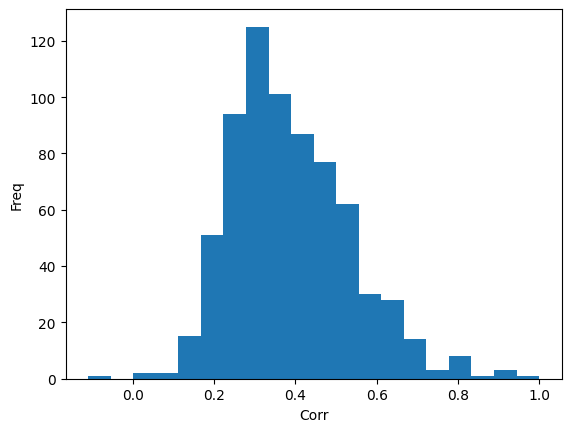

In [44]:
plt.hist(corrmdei, bins = 20)
plt.xlabel('Corr')
plt.ylabel('Freq')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = 

In [33]:
normalized_df = (_dg - _dg.mean()) / _dg.std()
correlations = normalized_df.corr()['dei'].drop('dei')

# Define buckets
bucket_size = 0.1
bins = [round(-1 + i * bucket_size, 1) for i in range(21)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

bucketed_words = correlations.groupby(pd.cut(correlations, bins=bins, labels=labels)).apply(lambda x: x.index.tolist())
bucketed_words = bucketed_words.reindex(labels).apply(lambda x: x if isinstance(x, list) else [])

correlation_df = pd.DataFrame({
    'correlation_range': labels,
    'words': bucketed_words.tolist()
})

/var/folders/b9/j4cr1qk10pgfhhshk13f4zgm0000gn/T/ipykernel_85044/3672852649.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucketed_words = correlations.groupby(pd.cut(correlations, bins=bins, labels=labels)).apply(lambda x: x.index.tolist())


In [34]:
correlation_df

,correlation_range,words
0,-1.0--0.9,[]
1,-0.9--0.8,[]
2,-0.8--0.7,[]
3,-0.7--0.6,[]
4,-0.6--0.5,[]
5,-0.5--0.4,[]
6,-0.4--0.3,[]
7,-0.3--0.2,[]
8,-0.2--0.1,[opus]
9,-0.1-0.0,[]


In [28]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/emilyzou/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

https://rachelke411.medium.com/text-classification-with-bag-of-bigrams-and-tf-idf-d7d4451813ff 
^ However, logistic regression doesn't work for us, since we're not looking to categorize words 
I want to see what kind of structure sentence is most common... not sure if there's anything there. 

In [31]:
sdf = df.head()
slist = [' '.join(x) for x in sdf['Raw_Tokens_Lower']] 

def postag (sent): 
    tokens = nltk.word_tokenize(sent)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

glist = [postag(m) for m in slist]
glist

glist[0]

[[('it', 'PRP'),
  ('is', 'VBZ'),
  ('related', 'VBN'),
  ('to', 'TO'),
  ('dei', 'VB'),
  ('and', 'CC'),
  ('competency', 'VB'),
  ('crisis', 'NN'),
  ('they', 'PRP'),
  ('edditors', 'VBP'),
  ('will', 'MD'),
  ('never', 'RB'),
  ('admit', 'VB'),
  ('the', 'DT'),
  ('truth', 'NN'),
  ('to', 'TO'),
  ('themselves', 'PRP'),
  ('they', 'PRP'),
  ('will', 'MD'),
  ('continue', 'VB'),
  ('to', 'TO'),
  ('play', 'VB'),
  ('the', 'DT'),
  ('le', 'NN'),
  ('right', 'RB'),
  ('wing', 'VBG'),
  ('chud', 'JJ'),
  ('le', 'NN'),
  ('bad', 'JJ'),
  ('angle', 'NN'),
  ('until', 'IN'),
  ('we', 'PRP'),
  ('are', 'VBP'),
  ('all', 'DT'),
  ('speaking', 'VBG'),
  ('chinese', 'JJ')],
 [('hire', 'VB'),
  ('a', 'DT'),
  ('bunch', 'NN'),
  ('niggers', 'NNS'),
  ('and', 'CC'),
  ('stronk', 'NN'),
  ('wimminz', 'NN'),
  ('because', 'IN'),
  ('globohomo', 'NN'),
  ('dei', 'NN'),
  ('funding', 'NN'),
  ('blackmail', 'NN'),
  ('planes', 'NNS'),
  ('fall', 'VBP'),
  ('apart', 'RB'),
  ('and', 'CC'),
  ('catch', 